# Business Intelligence Exam Project: Analytical Insights for New Car Dealership

## Objective
To gain valuable insights into the car market for a group of entrepreneurs planning to open a car dealership. The aim is to understand market trends, consumer preferences, and potential regional opportunities to ensure a successful business launch.

## Problem Statement
For new entrants in the car dealership industry, it’s crucial to understand the dynamics of the car market. Insights into consumer preferences, regional market potentials, and seasonal sales trends are essential for developing effective marketing strategies and choosing the right location for the dealership.

## Tasks
### Market Research and Data Analysis
- Conduct thorough research to identify current trends and preferences in the car market.
- Analyze factors crucial to car buyers, such as price, brand reputation, and other key influences on purchasing decisions.
- Explore regional market potentials to determine the most lucrative location for the dealership.
- Investigate how annual income influences consumer choices in car class and price range.
- Study sales trends throughout the year to identify high seasons for car sales.

### Hypothesis Testing
- Test the hypothesis that there is no significant correlation between car features, brand reputation, and purchasing preferences.
- Examine if attitudes towards car brands are uniform across different consumer groups.
- Investigate whether sales trends are consistent throughout the year without significant seasonal variations.
- Explore if preferences for newer or older car models are independent of demographic characteristics.

### Data-Driven Strategy Development
- Based on the findings, propose marketing strategies targeting identified consumer segments.
- Recommend a geographic location for the new dealership based on potential market growth and competition.
- Suggest car brands and models to stock that align with consumer preferences and regional demands.

### Application of Insights
- Develop a business plan encompassing marketing strategies and location selection.
- Consider creating a prototype tool for interactive visualization of market analysis and predictions, facilitating strategic planning and decision-making.


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  
from catboost import CatBoostRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, r2_score
from joblib import dump
from joblib import load
from prophet import Prophet




In [42]:
df = pd.read_csv('data/data.csv')


In [43]:
# We will start out with displaying the first few rows of the data

print(df.head())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [44]:
# Lets check for a summary of the data

print(df.describe())

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


In [45]:
# Lets now get some information regarding the data, as columns, data types, and non-null values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None


In [46]:
# now that we have information about the data, we can start cleaning it up

# We will start by checking for missing values

print(df.isnull().sum())

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [47]:
#We will now create a new column called 'City_Population' and map the population of the city to the region

population_mapping = {
    'Austin': 964177,
    'Janesville': 65942,
    'Scottsdale': 242753,
    'Pasco': 78871,
    'Aurora': 399913,
    'Middletown': 47108,
    'Greenville': 72095
  
}

df['City_Population'] = df['Dealer_Region'].map(population_mapping)

# Display the new column in correlation with the dealer region
dealer_region_and_population = df[['Dealer_Region', 'City_Population']]
print(dealer_region_and_population.head(11))

df.to_csv('data_with_population.csv', index=False)


   Dealer_Region  City_Population
0     Middletown            47108
1         Aurora           399913
2     Greenville            72095
3          Pasco            78871
4     Janesville            65942
5     Scottsdale           242753
6         Austin           964177
7         Austin           964177
8          Pasco            78871
9     Scottsdale           242753
10        Austin           964177


In [48]:
# To continue out path for anonymizing the data, we will drop the column that has no relevance for our analysis



df = df.drop('Dealer_No ', axis=1)
df = df.drop('Customer Name', axis=1)
df = df.drop('Dealer_Name', axis=1)


In [49]:
# Removing outliers from the price column
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price ($)'] >= lower_bound) & (df['Price ($)'] <= upper_bound)]


In [50]:
# Identifying outliers in 'Annual Income'
q1, q3 = df['Annual Income'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Annual Income'] >= lower_bound) & (df['Annual Income'] <= upper_bound)]

In [51]:
df.drop_duplicates(inplace=True)


In [52]:
print(df.isnull().sum())

Car_id             0
Date               0
Gender             0
Annual Income      0
Company            0
Model              0
Engine             0
Transmission       0
Color              0
Price ($)          0
Body Style         0
Phone              0
Dealer_Region      0
City_Population    0
dtype: int64


In [53]:
# Categorizing 'Sale_Likelihood' based on 'Price ($)' quantiles
df['Sale_Likelihood'] = pd.qcut(df['Price ($)'], q=4, labels=['low', 'medium-low', 'medium-high', 'high'])

In [54]:
# Lets now check for duplicates 

print(df.duplicated().sum())

0


In [55]:
# Summary statistics for numerical columns
print(df.describe())

       Annual Income     Price ($)         Phone  City_Population
count   2.169300e+04  21693.000000  2.169300e+04     21693.000000
mean    7.497752e+05  25429.581847  7.497452e+06    290016.299221
std     5.628610e+05  10678.833449  8.675179e+05    329155.099287
min     1.008000e+04   1200.000000  6.000101e+06     47108.000000
25%     3.650000e+05  18000.000000  6.746585e+06     65942.000000
50%     7.150000e+05  22001.000000  7.494977e+06     78871.000000
75%     1.100000e+06  31000.000000  8.248069e+06    399913.000000
max     2.355000e+06  57990.000000  8.999305e+06    964177.000000


In [56]:
# Lets try to understand the distribution of the data

print(df['Gender'].value_counts())


Male      17031
Female     4662
Name: Gender, dtype: int64


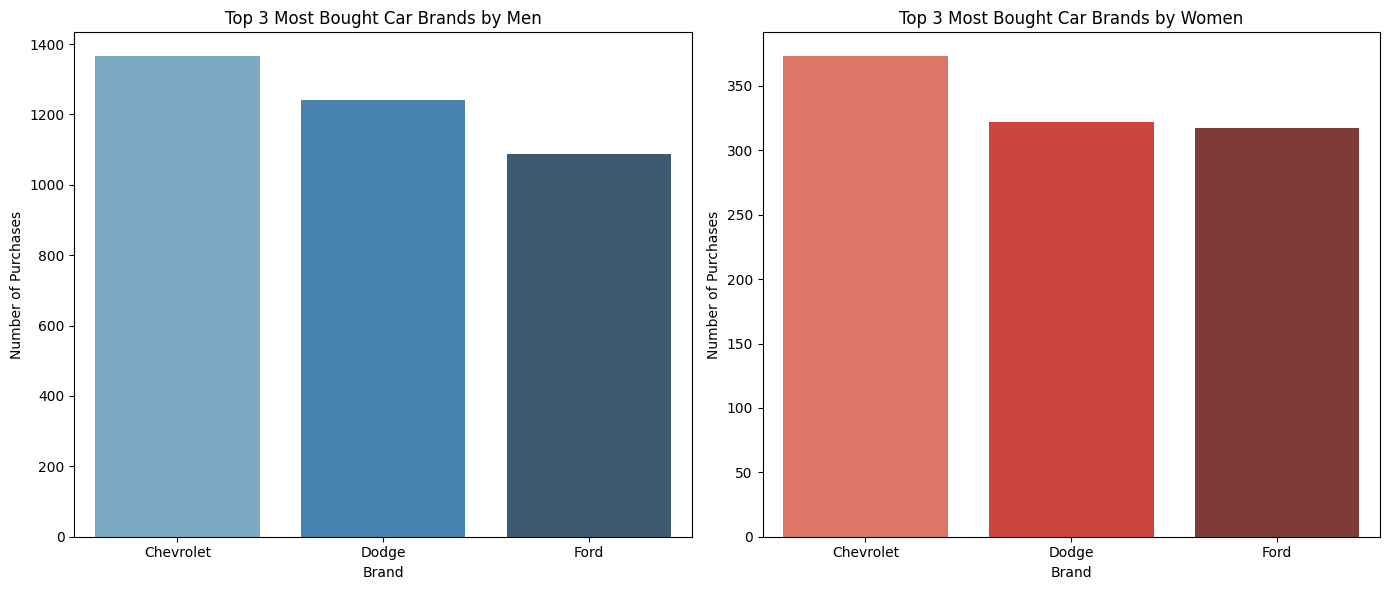

In [57]:

# Lets try to understand which brands are the most popular among men and woman
top_brands_men = df[df['Gender'] == 'Male']['Company'].value_counts().nlargest(3)
top_brands_women = df[df['Gender'] == 'Female']['Company'].value_counts().nlargest(3)

plt.figure(figsize=(14, 6))

# Plot for men
plt.subplot(1, 2, 1)
sns.barplot(x=top_brands_men.index, y=top_brands_men.values, palette='Blues_d')
plt.title('Top 3 Most Bought Car Brands by Men')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')

# Plot for women
plt.subplot(1, 2, 2)
sns.barplot(x=top_brands_women.index, y=top_brands_women.values, palette='Reds_d')
plt.title('Top 3 Most Bought Car Brands by Women')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')

plt.tight_layout()
plt.show()


In [58]:
print(df['Model'].value_counts())

Diamante         402
Prizm            399
Passat           371
Ram Pickup       367
RL               356
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            14
Sebring Conv.     10
Name: Model, Length: 154, dtype: int64


In [59]:
print(df['Dealer_Region'].value_counts())

Austin        3751
Janesville    3497
Scottsdale    3119
Middletown    2853
Pasco         2835
Greenville    2824
Aurora        2814
Name: Dealer_Region, dtype: int64


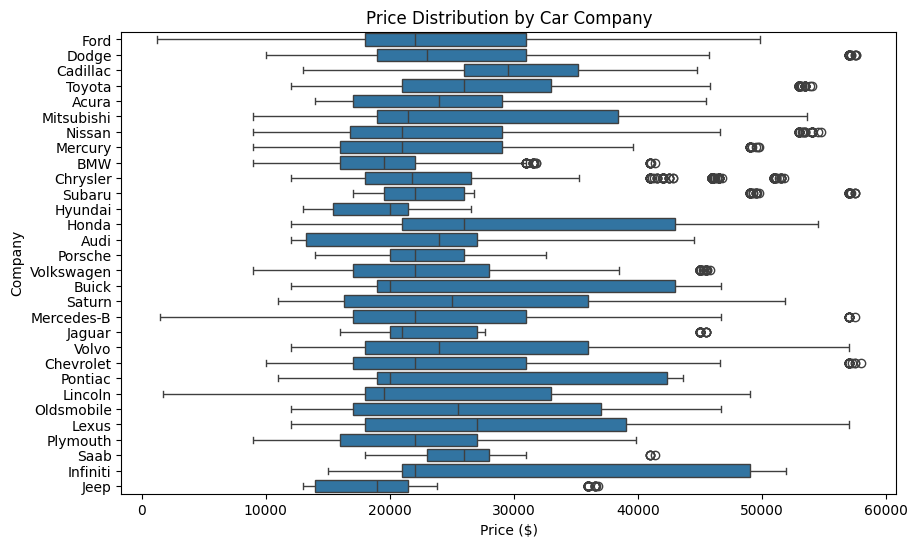

In [60]:
#  Price Distribution by Car Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', y='Company', data=df)
plt.title('Price Distribution by Car Company')
plt.xlabel('Price ($)')
plt.ylabel('Company')
plt.show()

In [61]:
categorical_features = ['Gender', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
df_one_hot = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype='int64')

# Convert 'Date' column to datetime format in df_one_hot
df_one_hot['Date'] = pd.to_datetime(df_one_hot['Date'])

# Now that 'Date' is a datetime column in df_one_hot, extract 'Year' and 'Month'
df_one_hot['Year'] = df_one_hot['Date'].dt.year
df_one_hot['Month'] = df_one_hot['Date'].dt.month

# Display the first few rows to verify the changes
df_one_hot.head()





,Car_id,Date,Annual Income,Price ($),Phone,City_Population,Sale_Likelihood,Gender_Female,Gender_Male,Company_Acura,...,Body Style_Sedan,Dealer_Region_Aurora,Dealer_Region_Austin,Dealer_Region_Greenville,Dealer_Region_Janesville,Dealer_Region_Middletown,Dealer_Region_Pasco,Dealer_Region_Scottsdale,Year,Month
0,C_CND_000001,2022-01-02,13500,26000,8264678,47108,medium-high,0,1,0,...,0,0,0,0,0,1,0,0,2022,1
1,C_CND_000002,2022-01-02,1480000,19000,6848189,399913,medium-low,0,1,0,...,0,1,0,0,0,0,0,0,2022,1
2,C_CND_000003,2022-01-02,1035000,31500,7298798,72095,high,0,1,0,...,0,0,0,1,0,0,0,0,2022,1
3,C_CND_000004,2022-01-02,13500,14000,6257557,78871,low,0,1,0,...,0,0,0,0,0,0,1,0,2022,1
4,C_CND_000005,2022-01-02,1465000,24500,7081483,65942,medium-high,0,1,1,...,0,0,0,0,1,0,0,0,2022,1


In [62]:
df = pd.read_csv('data/data.csv')

le_model = LabelEncoder()
le_company = LabelEncoder()
le_gender = LabelEncoder()
df['Model_encoded'] = le_model.fit_transform(df['Model'])
df['Company_encoded'] = le_company.fit_transform(df['Company'])
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])


In [63]:
features = ['Annual Income', 'Price ($)', 'Company_encoded', 'Model_encoded', 'Gender_encoded']
X = df[features]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [64]:
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

In [65]:
cluster_profiles = df.groupby('Cluster')[['Annual Income', 'Price ($)']].mean()
cluster_profiles['Most Frequent Company'] = le_company.inverse_transform(
    df.groupby('Cluster')['Company_encoded'].agg(lambda x: x.value_counts().idxmax())
)
cluster_profiles['Most Frequent Model'] = le_model.inverse_transform(
    df.groupby('Cluster')['Model_encoded'].agg(lambda x: x.value_counts().idxmax())
)
cluster_profiles['Dominant Gender'] = le_gender.inverse_transform(
    df.groupby('Cluster')['Gender_encoded'].agg(lambda x: x.mean().round().astype(int))
)

fig = px.scatter_3d(
    df,
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color='Cluster',
    opacity=0.7,
    size_max=5,
    title='3D Clustering'
)
fig.show()

print(cluster_profiles)

         Annual Income     Price ($) Most Frequent Company  \
Cluster                                                      
0         2.124836e+06  28235.591650                 Dodge   
1         7.245938e+05  27747.830798             Chevrolet   
2         1.476743e+04  27901.671687             Chevrolet   
3         9.753151e+05  28649.979551             Chevrolet   
4         3.887951e+06  29671.901235                 Dodge   
5         1.663133e+06  27752.670581             Chevrolet   
6         2.823901e+06  29164.370000            Volkswagen   
7         4.786035e+05  28194.237614             Chevrolet   
8         5.815634e+06  29832.000000                Nissan   
9         1.297326e+06  28049.042210                  Ford   

        Most Frequent Model Dominant Gender  
Cluster                                      
0                     Jetta            Male  
1                     Prizm            Male  
2                    Passat            Male  
3                    Pass

In [66]:
dump(X_pca, 'models/pca/df_reduced.joblib') 

['models/pca/df_reduced.joblib']

In [67]:
print(df_one_hot.head())

         Car_id       Date  Annual Income  Price ($)    Phone  \
0  C_CND_000001 2022-01-02          13500      26000  8264678   
1  C_CND_000002 2022-01-02        1480000      19000  6848189   
2  C_CND_000003 2022-01-02        1035000      31500  7298798   
3  C_CND_000004 2022-01-02          13500      14000  6257557   
4  C_CND_000005 2022-01-02        1465000      24500  7081483   

   City_Population Sale_Likelihood  Gender_Female  Gender_Male  Company_Acura  \
0            47108     medium-high              0            1              0   
1           399913      medium-low              0            1              0   
2            72095            high              0            1              0   
3            78871             low              0            1              0   
4            65942     medium-high              0            1              1   

   ...  Body Style_Sedan  Dealer_Region_Aurora  Dealer_Region_Austin  \
0  ...                 0                     0    

In [69]:
features = ['Annual Income', 'Price ($)']
df_selected_features = df[features]


print(df_selected_features.head())

   Annual Income  Price ($)
0          13500      26000
1        1480000      19000
2        1035000      31500
3          13500      14000
4        1465000      24500


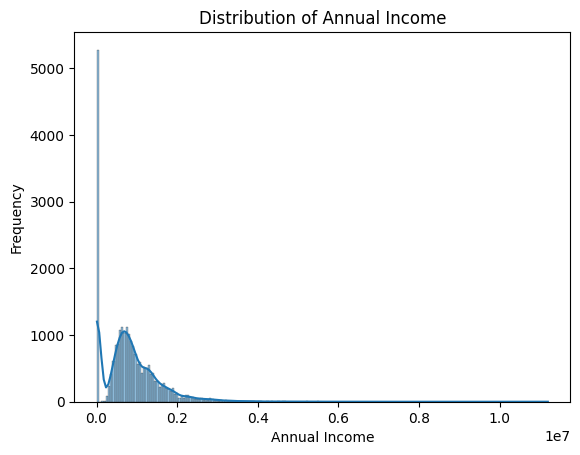

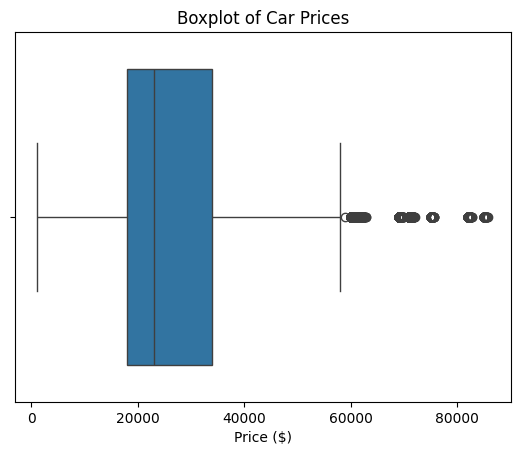

In [70]:
# Histogram for Annual Income
sns.histplot(df['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Price ($)
sns.boxplot(x=df['Price ($)'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price ($)')
plt.show()

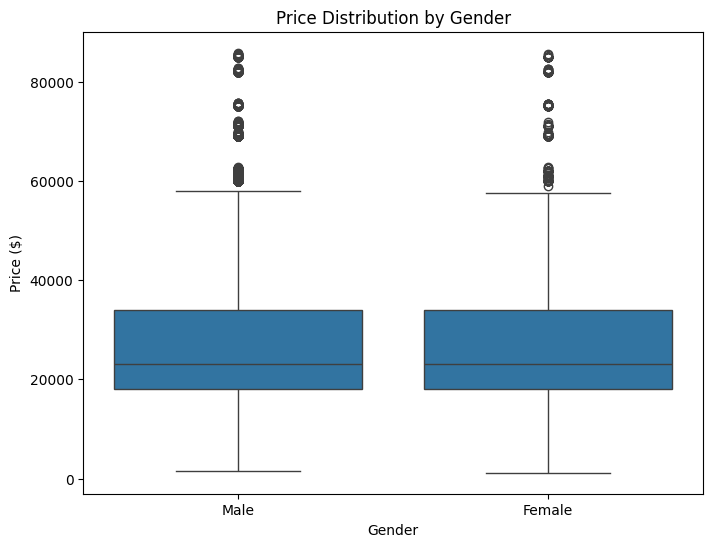

In [71]:
# Lets create a boxplot to understand the distribution of the price in relation to gender

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title('Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.show()

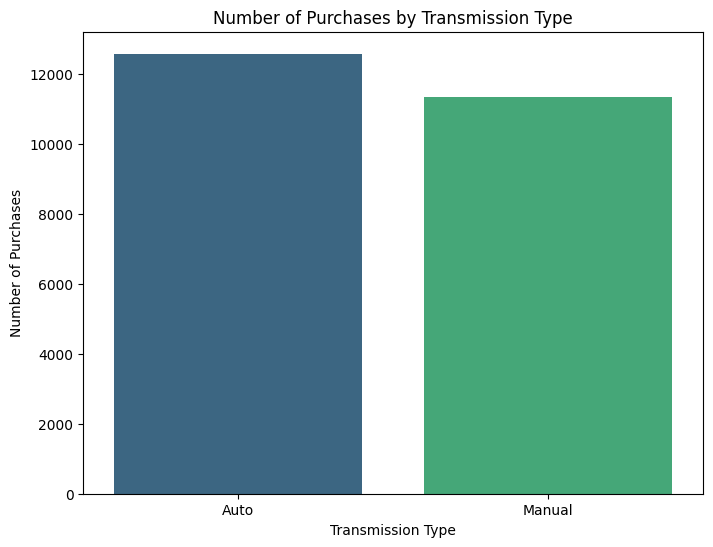

In [72]:
# It could be interesting to understand which transmission type is the most popular
transmission_counts = df['Transmission'].value_counts()

# Plotting for transmission type
plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')
plt.title('Number of Purchases by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)  
plt.show()

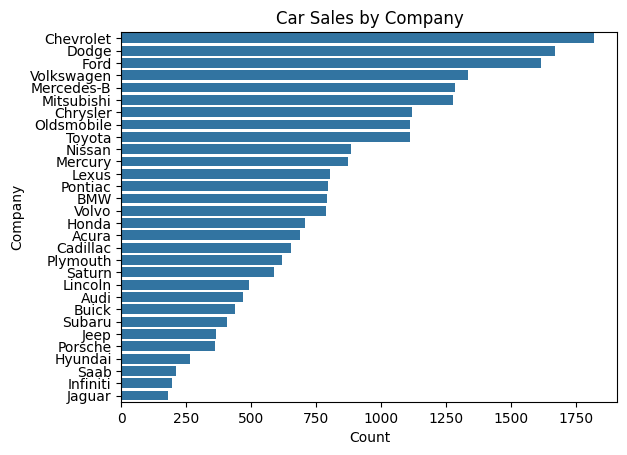

In [73]:
# Bar chart for Company
sns.countplot(y=df['Company'], order = df['Company'].value_counts().index)
plt.title('Car Sales by Company')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

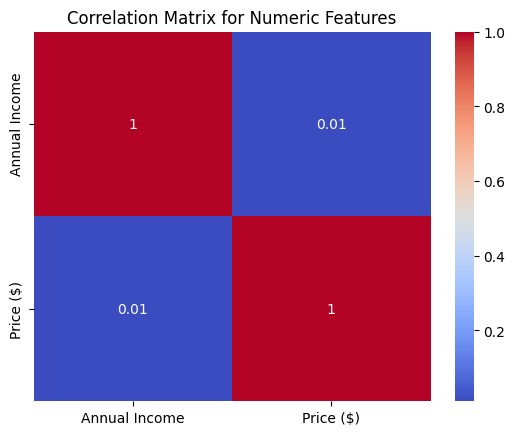

In [74]:
corr_matrix = df_one_hot[['Annual Income', 'Price ($)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()


In [75]:
# Print the city_population of houston
print(df['Dealer_Region'].value_counts())



Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: Dealer_Region, dtype: int64


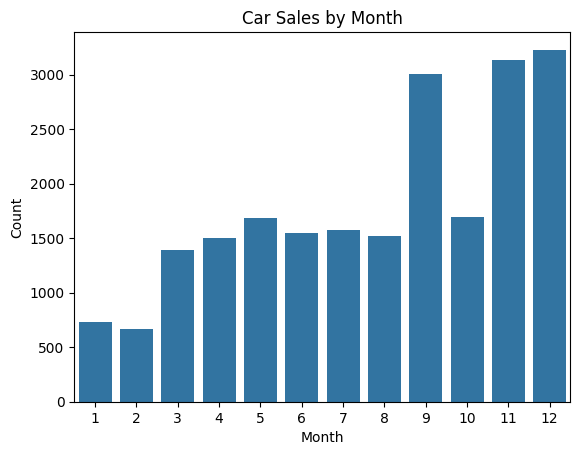

In [76]:
# Visualizing sales by month
sns.countplot(x=df_one_hot['Month'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [77]:
df_selected_features.sample(10).T

,19203,15820,23669,12743,7697,16015,10832,2696,15350,2931
Annual Income,13500,487500,13500,1048000,1505000,1600000,875000,1100000,580000,911982
Price ($),15000,38500,14000,26801,17500,20000,16000,16000,20000,69980


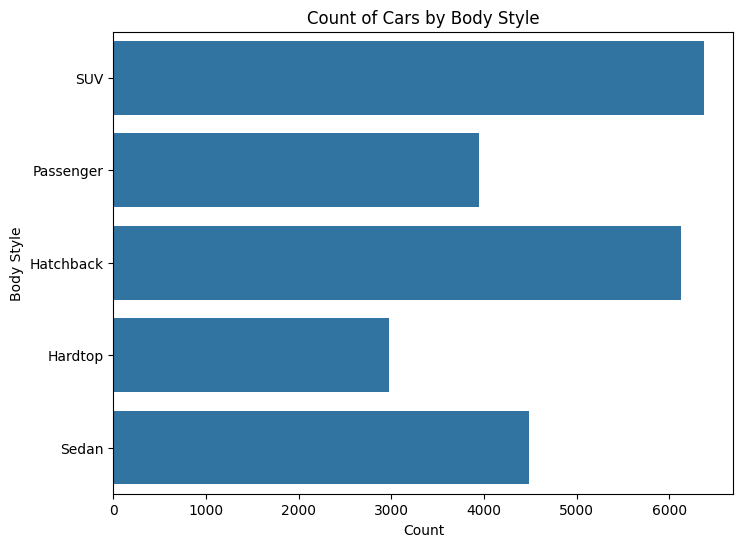

In [78]:
# Lets see what body styles are the most popular

plt.figure(figsize=(8, 6))
sns.countplot(y='Body Style', data=df)
plt.title('Count of Cars by Body Style')
plt.xlabel('Count')
plt.ylabel('Body Style')
plt.show()

In [79]:
print(df['Dealer_Region'])

0        Middletown
1            Aurora
2        Greenville
3             Pasco
4        Janesville
            ...    
23901         Pasco
23902    Middletown
23903    Scottsdale
23904        Austin
23905    Middletown
Name: Dealer_Region, Length: 23906, dtype: object


In [80]:
# Ensure we add 'City_Population' before applying one-hot encoding to include it in df_one_hot
df['City_Population'] = df['Dealer_Region'].map(population_mapping)



## Her kommer sitthis del, om mere exploration af regions og salg.

In [81]:
region_stats = df.groupby('Dealer_Region')[['Color', 'Model', 'Body Style']].agg(lambda x:x.value_counts().index[0])

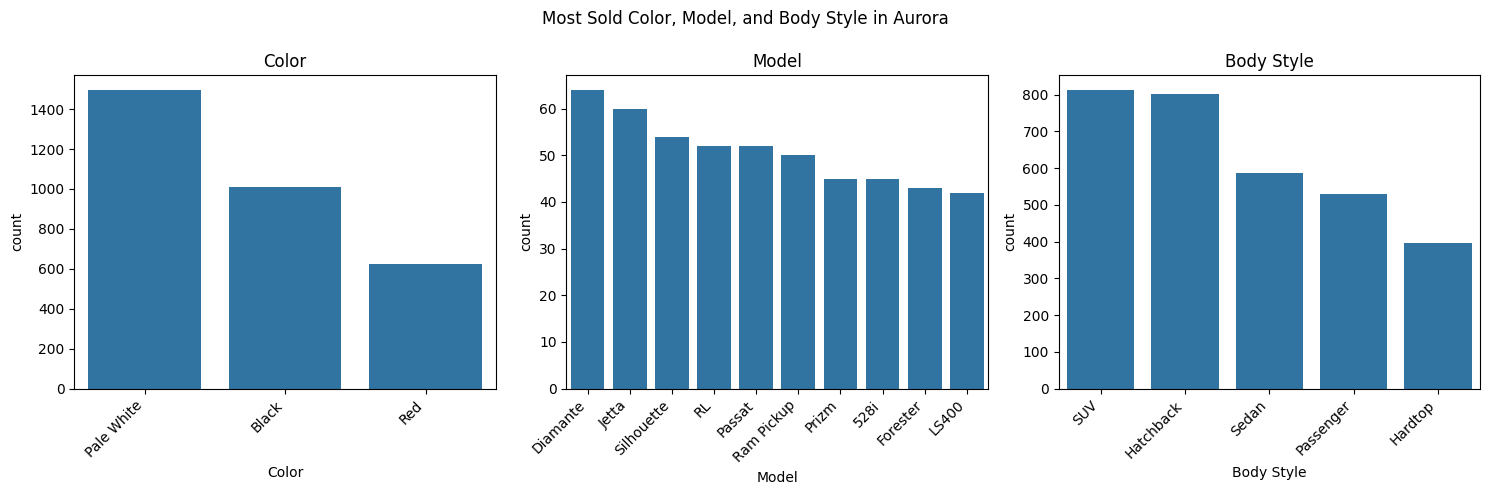

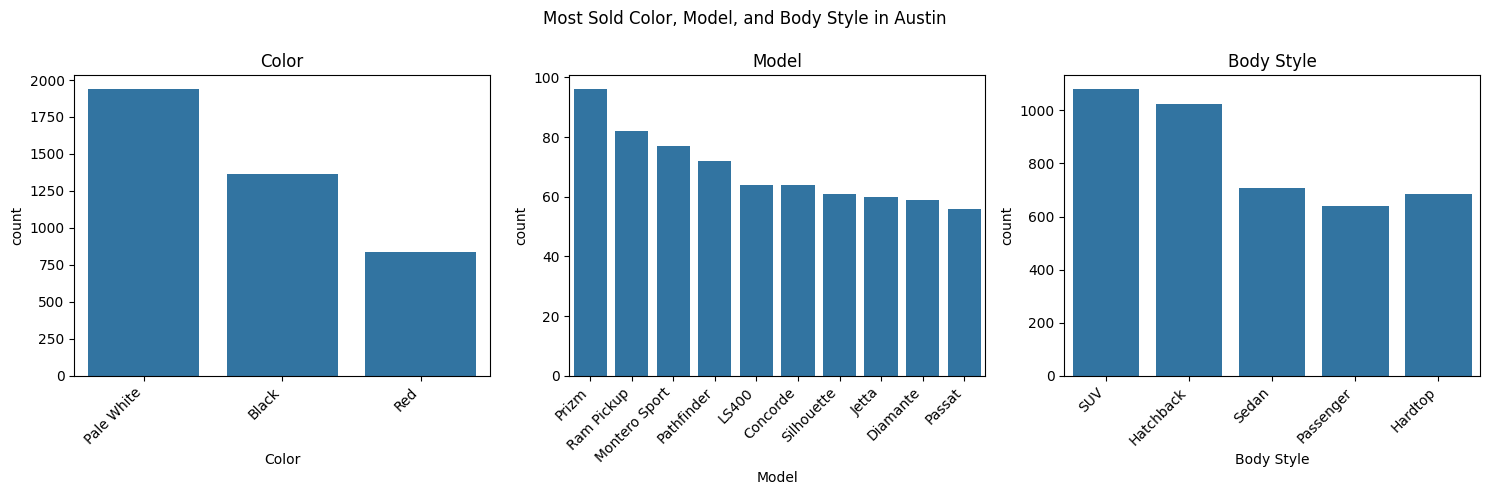

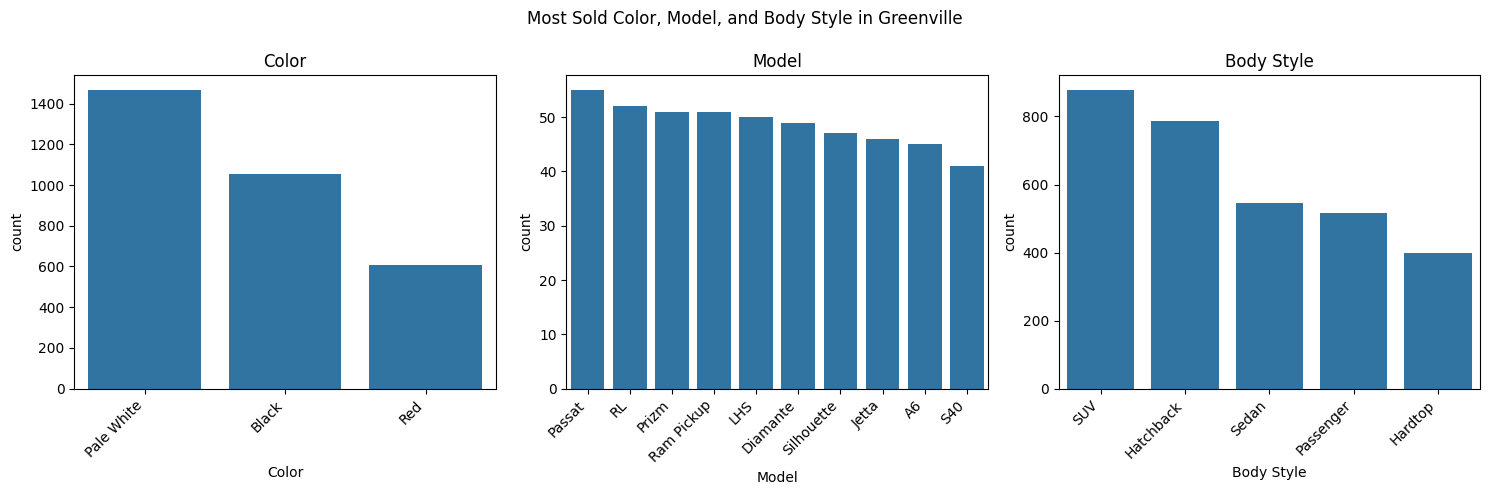

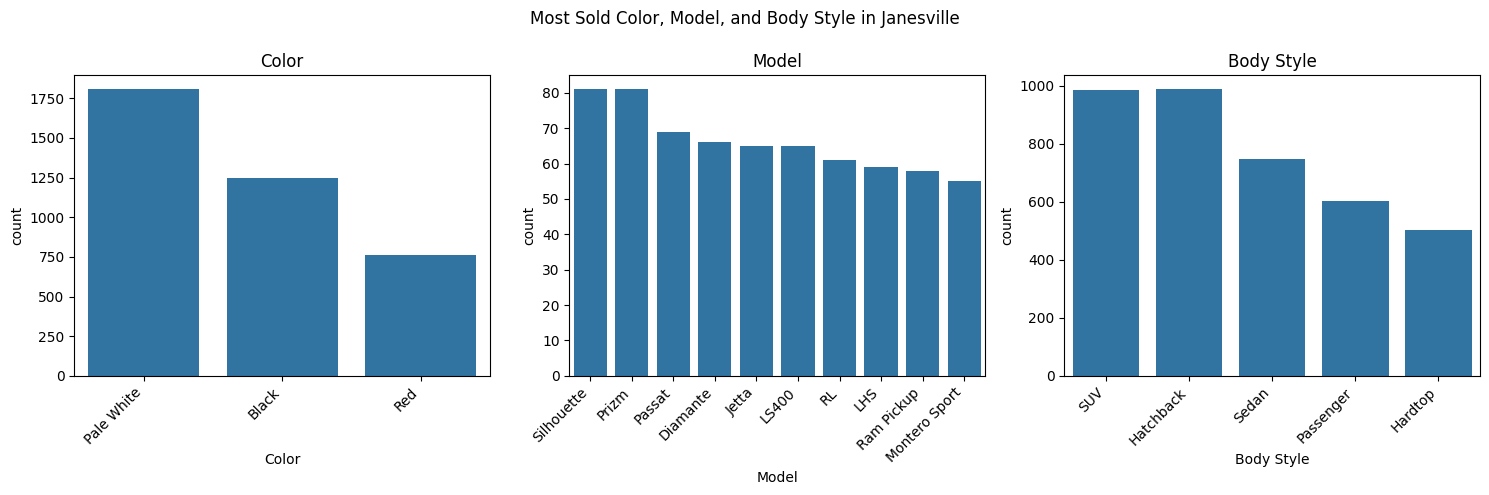

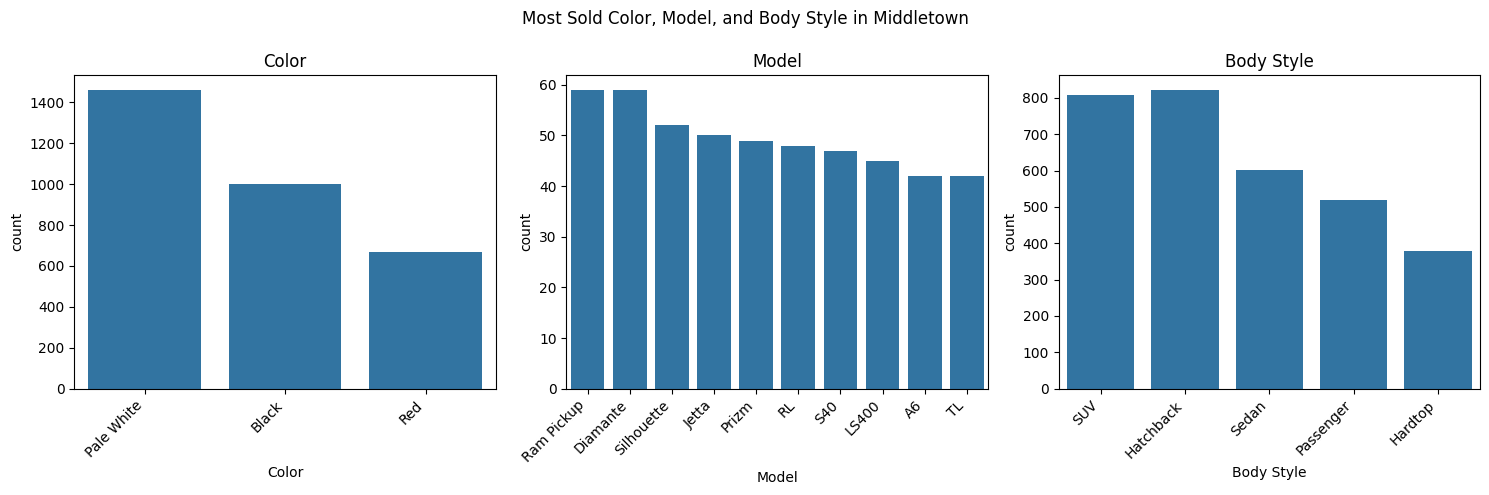

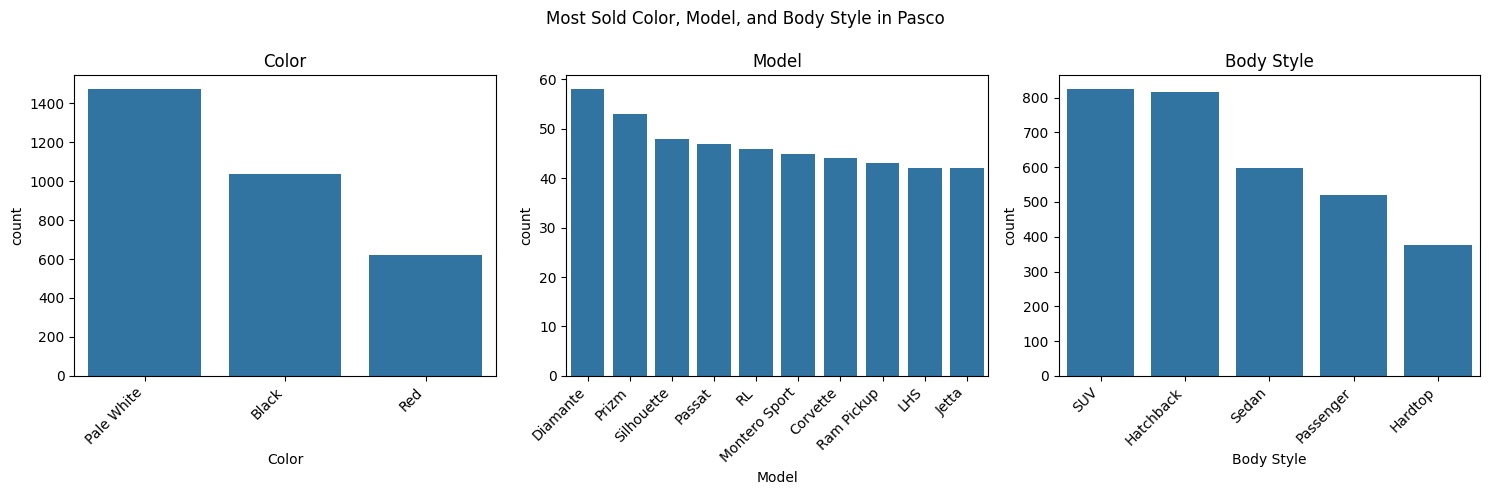

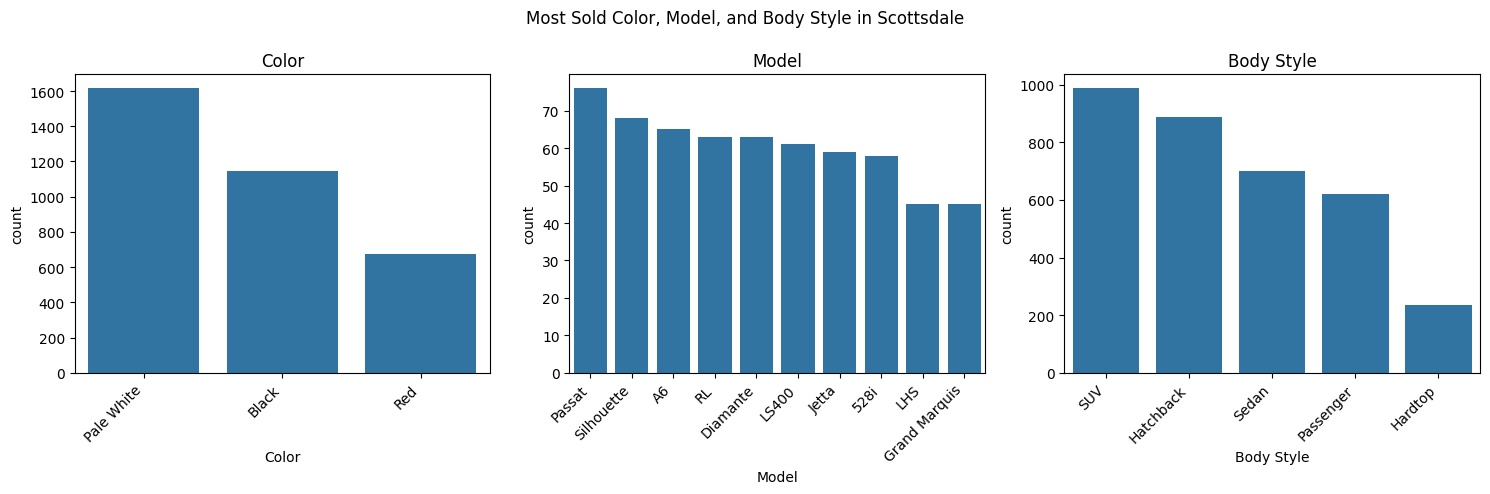

In [82]:
for region in region_stats.index:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Most Sold Color, Model, and Body Style in {region}")

    sns.countplot(ax=axes[0], data=df[df['Dealer_Region'] == region], x='Color', order=df['Color'].value_counts().index)
    axes[0].set_title('Color')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

    top_10_models = df[df['Dealer_Region'] == region]['Model'].value_counts().nlargest(10).index.tolist()
    sns.countplot(ax=axes[1], data=df[df['Dealer_Region'] == region], x='Model', order=top_10_models)
    axes[1].set_title('Model')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

    sns.countplot(ax=axes[2], data=df[df['Dealer_Region'] == region], x='Body Style', order=df['Body Style'].value_counts().index)
    axes[2].set_title('Body Style')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    plt.show()

In [83]:
# Find the top 10 combinations of color, model, and body style with the most occurrences
top_10_combinations = df.groupby(['Color', 'Model', 'Body Style']).size().nlargest(10)

# Find the region for each combination
combinations_and_regions = {}
for combination in top_10_combinations.index:
    region = df[(df['Color'] == combination[0]) & 
                (df['Model'] == combination[1]) &
                (df['Body Style'] == combination[2])]['Dealer_Region'].mode().iloc[0]
    combinations_and_regions[combination] = region


In [84]:
# Find the region for each combination
combinations_and_regions = {}
for combination in top_10_combinations.index:
    region = df[(df['Color'] == combination[0]) & 
                (df['Model'] == combination[1]) &
                (df['Body Style'] == combination[2])]['Dealer_Region'].mode().iloc[0]
    combinations_and_regions[combination] = region

In [85]:
print("Top 10 Combinations with most purchases:")
for i, (combination, count) in enumerate(top_10_combinations.items(), 1):
    print(f"{i}. Combination: {combination}, Occurrences: {count}, Region: {combinations_and_regions[combination]}")

Top 10 Combinations with most purchases:
1. Combination: ('Pale White', 'Passat', 'Hatchback'), Occurrences: 222, Region: Scottsdale
2. Combination: ('Black', 'Diamante', 'Hatchback'), Occurrences: 200, Region: Austin
3. Combination: ('Pale White', 'Silhouette', 'Sedan'), Occurrences: 196, Region: Janesville
4. Combination: ('Pale White', 'Jetta', 'Passenger'), Occurrences: 188, Region: Austin
5. Combination: ('Black', 'A6', 'SUV'), Occurrences: 180, Region: Scottsdale
6. Combination: ('Pale White', 'Metro', 'Passenger'), Occurrences: 180, Region: Austin
7. Combination: ('Pale White', 'Celica', 'SUV'), Occurrences: 178, Region: Scottsdale
8. Combination: ('Pale White', 'Corvette', 'SUV'), Occurrences: 173, Region: Pasco
9. Combination: ('Pale White', 'SLK', 'Passenger'), Occurrences: 173, Region: Aurora
10. Combination: ('Black', 'LS400', 'Sedan'), Occurrences: 168, Region: Austin


In [86]:
combinations = [f"{combination[0]}, {combination[1]}, {combination[2]}" for combination in top_10_combinations.index]
occurrences = list(top_10_combinations)
regions = [combinations_and_regions[combination] for combination in top_10_combinations.index]

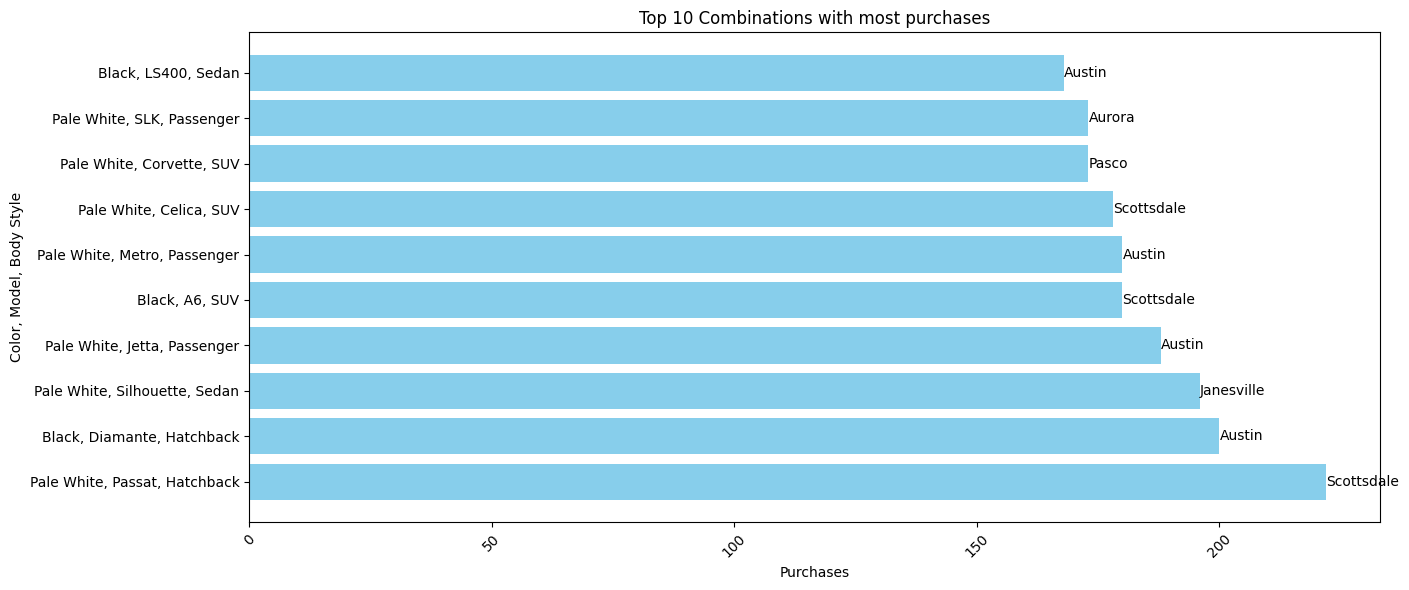

In [87]:
# Plotting
plt.figure(figsize=(14, 6))
plt.barh(combinations, occurrences, color='skyblue')
plt.xlabel('Purchases')
plt.ylabel('Color, Model, Body Style')
plt.title('Top 10 Combinations with most purchases')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with its respective region
for i, region in enumerate(regions):
    plt.text(occurrences[i], i, region, ha='left', va='center')

plt.show()

In [88]:
## Reinsert data that is not scaled 
data = pd.read_csv('data/data.csv')

In [89]:
# Calculate total sales for each region
sales_by_region = data.groupby('Dealer_Region')['Price ($)'].sum()
sales_by_region

Dealer_Region
Aurora         88687382
Austin        117192531
Greenville     88149602
Janesville    106351234
Middletown     87134628
Pasco          88040714
Scottsdale     95969374
Name: Price ($), dtype: int64

In [90]:
# Calculate average annual income for each region
income_by_region = data.groupby('Dealer_Region')['Annual Income'].mean()
income_by_region

Dealer_Region
Aurora        845510.435783
Austin        822849.572189
Greenville    832667.512788
Janesville    833916.268778
Middletown    825592.651854
Pasco         853975.290323
Scottsdale    805682.702884
Name: Annual Income, dtype: float64

In [91]:
# Combine total sales and average annual income into a DataFrame
sales_income_data = pd.DataFrame({'Total Sales': sales_by_region, 'Average Annual Income': income_by_region})


In [92]:
# Sort the DataFrame by total sales in descending order
sales_income_data = sales_income_data.sort_values(by='Total Sales', ascending=False)
sales_income_data

,Total Sales,Average Annual Income
Dealer_Region,,
Austin,117192531,822849.572189
Janesville,106351234,833916.268778
Scottsdale,95969374,805682.702884
Aurora,88687382,845510.435783
Greenville,88149602,832667.512788
Pasco,88040714,853975.290323
Middletown,87134628,825592.651854


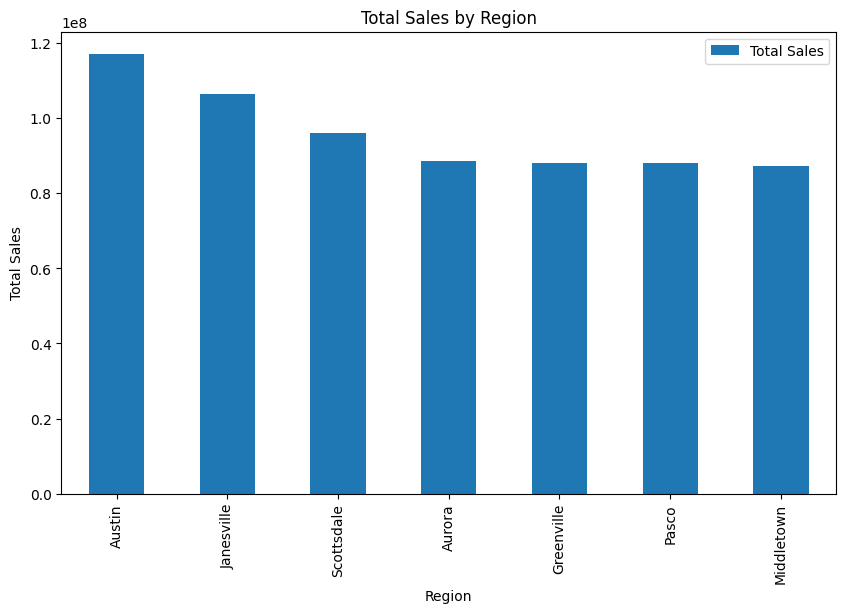

In [93]:
# Visualize the data
sales_income_data.plot(kind='bar', y='Total Sales', figsize=(10, 6))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

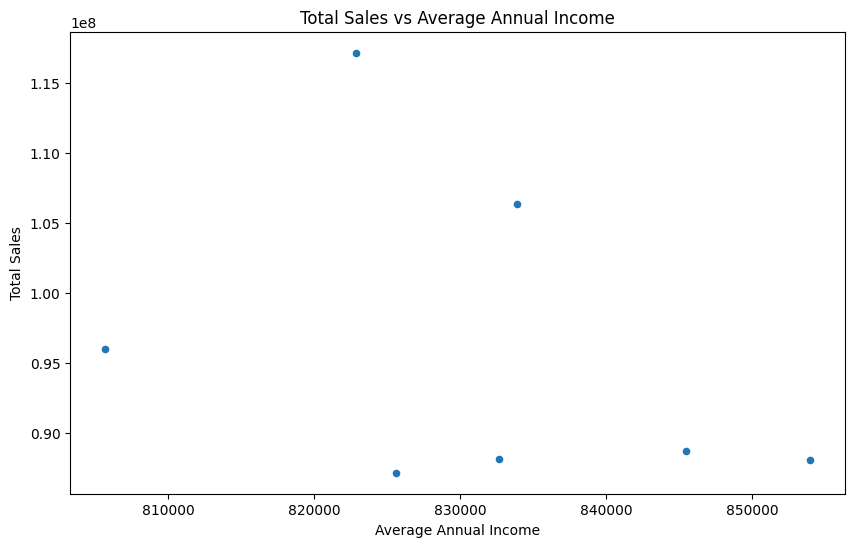

In [94]:
sales_income_data.plot(kind='scatter', x='Average Annual Income', y='Total Sales', figsize=(10, 6))
plt.title('Total Sales vs Average Annual Income')
plt.xlabel('Average Annual Income')
plt.ylabel('Total Sales')
plt.show()

In [95]:
# Region with the highest sales potential
highest_potential_region = sales_income_data.index[0]
print(f"The region with the highest sales potential is {highest_potential_region}.")

The region with the highest sales potential is Austin.


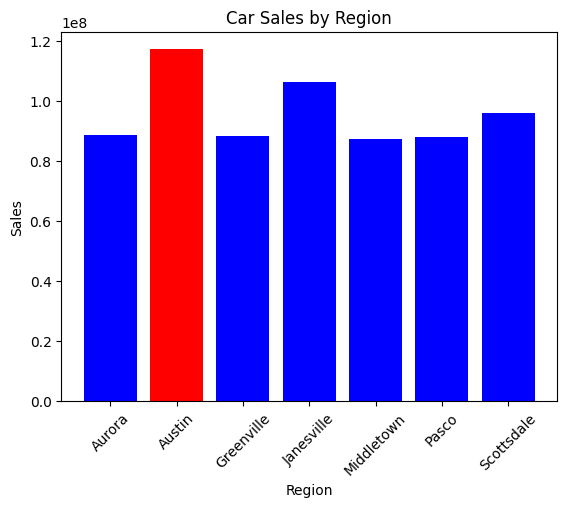

In [96]:

# Find the region with the highest sales
highest_sales_region = sales_by_region.idxmax()

# Create a list to hold colors for each region
colors = ['red' if region == highest_sales_region else 'blue' for region in sales_by_region.index]

# Create the bar plot with colors
plt.bar(sales_by_region.index, sales_by_region.values, color=colors)
plt.title('Car Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.show()



In [97]:
# Filter data for dealerships in Austin
austin_dealerships = data[data['Dealer_Region'] == 'Austin']

# Group data by unique dealerships and sum the price
austin_data = austin_dealerships.groupby('Dealer_Name')['Price ($)'].sum()

# Print the result
austin_data

Dealer_Name
Buddy Storbeck's Diesel Service Inc                  600104
C & M Motors Inc                                     930009
Capitol KIA                                          815104
Chrysler Plymouth                                    506700
Chrysler of Tri-Cities                               916805
Classic Chevy                                       1685121
Clay Johnson Auto Sales                            14243423
Diehl Motor CO Inc                                   829164
Enterprise Rent A Car                                789308
Gartner Buick Hyundai Saab                           707004
Hatfield Volkswagen                                  637806
Iceberg Rentals                                      692208
McKinney Dodge Chrysler Jeep                        2230320
Motor Vehicle Branch Office                        14273697
Nebo Chevrolet                                      1024303
New Castle Ford Lincoln Mercury                      626354
Pars Auto Sales             

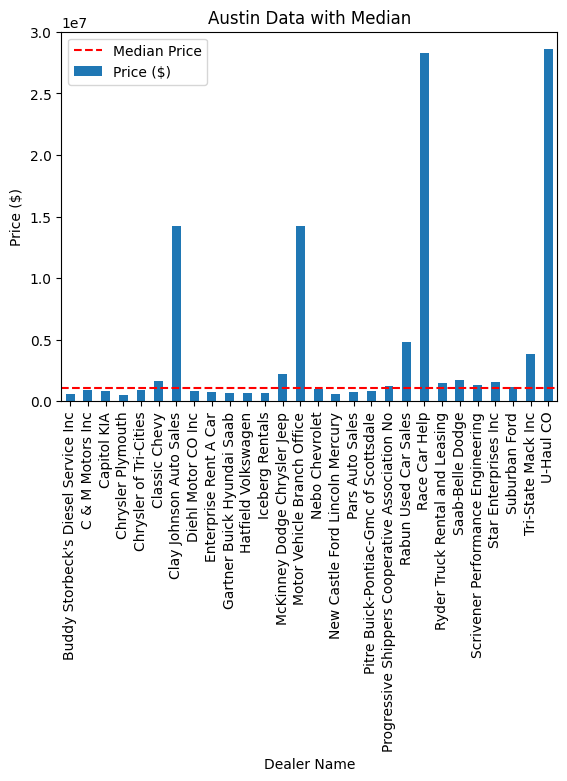

In [98]:
median_price = austin_data.median()

# Plotting the bar chart
austin_data.plot(x='Dealer_Name', y='Price ($)', kind='bar')
plt.xlabel('Dealer Name')
plt.ylabel('Price ($)')
plt.title('Austin Data with Median')

# Adding the median line
plt.axhline(median_price, color='red', linestyle='--', label='Median Price')

plt.legend()  
plt.show()




In [99]:
janesville_dealerships = data[data['Dealer_Region'] == 'Janesville']

janesville_data = janesville_dealerships.groupby('Dealer_Name')['Price ($)'].sum()

janesville_data

Dealer_Name
Buddy Storbeck's Diesel Service Inc                  663003
C & M Motors Inc                                     698805
Capitol KIA                                          712901
Chrysler Plymouth                                  13929888
Chrysler of Tri-Cities                               509005
Classic Chevy                                        689003
Clay Johnson Auto Sales                              635509
Diehl Motor CO Inc                                   688804
Enterprise Rent A Car                                810707
Gartner Buick Hyundai Saab                           706809
Hatfield Volkswagen                                  781408
Iceberg Rentals                                    14602773
McKinney Dodge Chrysler Jeep                         738702
Motor Vehicle Branch Office                          700004
Nebo Chevrolet                                       394251
New Castle Ford Lincoln Mercury                      779804
Pars Auto Sales             

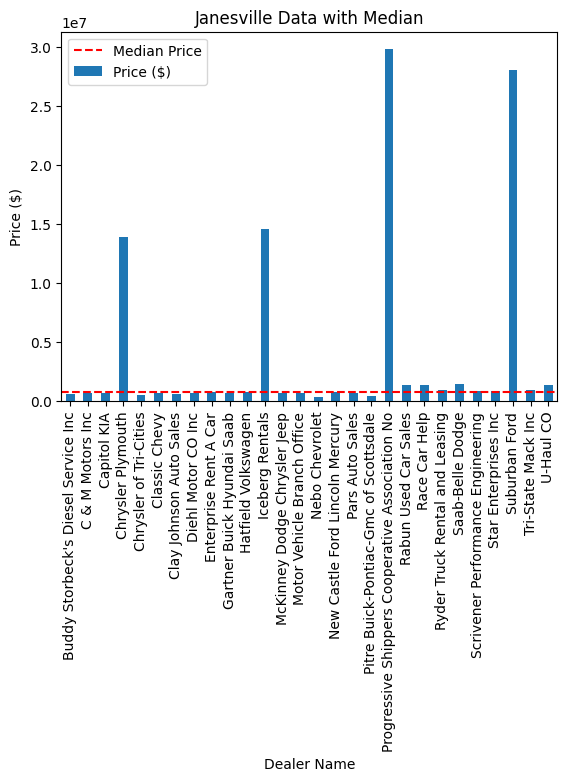

In [100]:
median_price = janesville_data.median()

# Plotting the bar chart
janesville_data.plot(x='Dealer_Name', y='Price ($)', kind='bar')
plt.xlabel('Dealer Name')
plt.ylabel('Price ($)')
plt.title('Janesville Data with Median')

# Adding the median line
plt.axhline(median_price, color='red', linestyle='--', label='Median Price')

plt.legend()  
plt.show()

In [101]:
scottsdale_dealerships = data[data['Dealer_Region'] == 'Scottsdale']
scottsville_data = scottsdale_dealerships.groupby('Dealer_Name')['Price ($)'].sum()
scottsville_data

Dealer_Name
Buddy Storbeck's Diesel Service Inc                  847808
C & M Motors Inc                                     758204
Capitol KIA                                          590005
Chrysler Plymouth                                    384695
Chrysler of Tri-Cities                               431600
Classic Chevy                                      13005514
Clay Johnson Auto Sales                              509503
Diehl Motor CO Inc                                   526508
Enterprise Rent A Car                                576783
Gartner Buick Hyundai Saab                           644006
Hatfield Volkswagen                                  760389
Iceberg Rentals                                      698808
McKinney Dodge Chrysler Jeep                       12756783
Motor Vehicle Branch Office                          774002
Nebo Chevrolet                                       409703
New Castle Ford Lincoln Mercury                      467992
Pars Auto Sales             

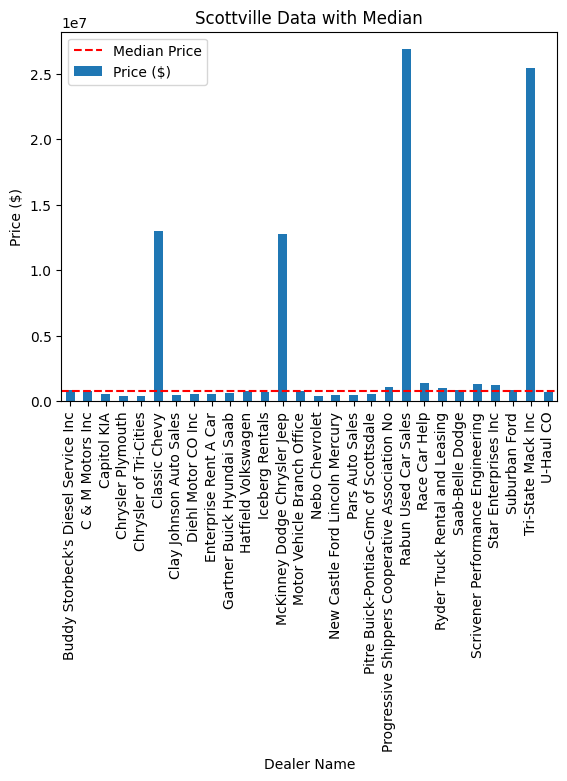

In [102]:
median_price = scottsville_data.median()

# Plotting the bar chart
scottsville_data.plot(x='Dealer_Name', y='Price ($)', kind='bar')
plt.xlabel('Dealer Name')
plt.ylabel('Price ($)')
plt.title('Scottville Data with Median')

# Adding the median line
plt.axhline(median_price, color='red', linestyle='--', label='Median Price')

plt.legend()  
plt.show()


### Machine learning 


In [103]:
df = pd.read_csv('data/data.csv')

# Lets start by encoding the categorical columns
categorical_cols = ['Gender', 'Engine', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']

# for each categorical column, create a new column with the label encoded values and save the label encoder to a dictionary for later use 
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
    dump(le, f'models/encoders/label_encoder_{col}.joblib')

# Prepare features and target for model training
X = df[categorical_cols]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
# Save PCA model
dump(pca, 'models/pca/pca_model.joblib')

y = df['Price ($)']

# Let us now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=145)

# Define and train models
models = [
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('XGBoost Regressor', XGBRegressor()),
    ('CatBoost Regressor', CatBoostRegressor(verbose=False))
]

for model_name, model in models:
    model.fit(X_train, y_train)
    
    dump(model, f'models/regressors/{model_name}.joblib')

    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R^2): {r2}')
    print('-' * 40)


Model: Decision Tree Regressor
Mean Absolute Error (MAE): 4386.409417885284
R-squared (R^2): 0.6249053973265635
----------------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 4456.283793801416
R-squared (R^2): 0.6485862780515839
----------------------------------------
Model: XGBoost Regressor
Mean Absolute Error (MAE): 6484.254985329098
R-squared (R^2): 0.5484434722342426
----------------------------------------
Model: CatBoost Regressor
Mean Absolute Error (MAE): 7431.9756529927345
R-squared (R^2): 0.48210821074248567
----------------------------------------


In [104]:


# Load LabelEncoders using the absolute path
label_encoders = {}
categorical_cols = ['Gender', 'Engine', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
for col in categorical_cols:
    label_encoders[col] = load(f'models/encoders/label_encoder_{col}.joblib')

# Load the PCA model using the absolute path
pca_model = load('models/pca/pca_model.joblib')


In [105]:
def preprocess_data(new_data, label_encoders, pca_model):
    # Apply LabelEncoder to each categorical column
    for col in categorical_cols:
        if col in new_data.columns:
            new_data[col] = label_encoders[col].transform(new_data[col])
    
    # Prepare data for PCA transformation
    X_new = new_data[categorical_cols]
    
    # Apply PCA
    X_new_pca = pca_model.transform(X_new)
    
    return X_new_pca


In [106]:
# Lets load the random forest model as it had the best performance
random_forest_model = load('models/regressors/Random Forest Regressor.joblib')


In [107]:
new_data = pd.DataFrame({
    'Gender': ['Male'],  
    'Engine': ['DoubleÂ Overhead Camshaft'], 
    'Company': ['Toyota'],  
    'Model': ['Camry'],  
    'Transmission': ['Auto'],  
    'Color': ['Black'],  
    'Body Style': ['Sedan'],  
    'Dealer_Region': ['Middletown']  
})

# preprocessing to this new data
X_new_pca = preprocess_data(new_data, label_encoders, pca_model)


In [108]:
# Make predictions
predictions = random_forest_model.predict(X_new_pca)

# Output the prediction
predicted_price = predictions[0]
print(f"Predicted Sale Price: ${predicted_price:.2f}")


Predicted Sale Price: $30969.61


In [109]:
new_car_data = pd.DataFrame({
    'Gender': ['Male'],  
    'Engine': ['DoubleÂ Overhead Camshaft'],  
    'Company': ['Ford'],  
    'Model': ['Contour'],  
    'Transmission': ['Manual'],  
    'Color': ['Black'],  
    'Body Style': ['Sedan'], 
    'Dealer_Region': ['Austin']  
})

X_new_car_pca = preprocess_data(new_car_data, label_encoders, pca_model)


In [110]:

predicted_price = random_forest_model.predict(X_new_car_pca)

print(f"Predicted Price for the new car: ${predicted_price[0]}")


Predicted Price for the new car: $39914.33983333333


In [111]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)


# Resample the data 
df_monthly = df[['Price ($)']].resample('M').mean().reset_index()

# Prepare data for Prophet 
df_prophet = df_monthly.rename(columns={'Date': 'ds', 'Price ($)': 'y'})

# Initialize and fit the model
if {'ds', 'y'}.issubset(df_prophet.columns):
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_prophet)

    # Let us create a future DataFrame for the next 12 months so we can predict future prices
    future = model.make_future_dataframe(periods=12, freq='M')

    # Predict future prices
    forecast = model.predict(future)




INFO:prophet:n_changepoints greater than number of observations. Using 18.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [112]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecast
fig_forecast = plot_plotly(model, forecast)
fig_forecast.show()

# Plot the forecast components
fig_components = plot_components_plotly(model, forecast)
fig_components.show()


In [113]:
df_with_pop = pd.read_csv('data/data_with_population.csv')

sales_data_by_region = df_with_pop.groupby('Dealer_Region').agg({
    'Price ($)': ['count', 'sum', 'mean'],  # 'count' here represents the total cars sold
    'Dealer_Name': pd.Series.nunique,
    'City_Population': 'mean'  # Assuming each row has the correct population for its region
}).reset_index()

# Renaming the columns for clarity
sales_data_by_region.columns = ['Dealer_Region', 'Total_Cars_Sold', 'Total_Revenue', 'Average_Sale_Price', 'Number_of_Dealerships', 'Average_Population']
